### Using Deep Learning for Predicting Expectancy after Thoracic Surgery 

In [1]:
# Load EDA packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense,Activation

Using TensorFlow backend.


In [3]:
df = pd.read_csv("thoracicsurgerydata.csv")

In [4]:
df.head()

,Diagnosis,FVC,FEV,PerformanceZscal,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,TNM,DM,MI,PAD,Smoking,Asthma,AGE,Risk
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [6]:
df.dtypes

Diagnosis            object
FVC                 float64
FEV                 float64
PerformanceZscal     object
Pain                 object
Haemoptysis          object
Dyspnoea             object
Cough                object
Weakness             object
TNM                  object
DM                   object
MI                   object
PAD                  object
Smoking              object
Asthma               object
AGE                   int64
Risk                 object
dtype: object

In [7]:
df1 = df

In [8]:
# Change to Numerical Data
df1.replace({
    'T':1,
    'F':0,
    'PRZ0':0,
    'PRZ1':1,
    'PRZ2':2,
    'OC10':0,
    'OC11':1,
    'OC12':2,
    'OC13':3,
    'OC14':4,
    'OC15':5
},inplace=True)

In [9]:
df1.head()

,Diagnosis,FVC,FEV,PerformanceZscal,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,TNM,DM,MI,PAD,Smoking,Asthma,AGE,Risk
0,DGN2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,DGN3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,DGN3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,DGN3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,DGN3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [10]:
df1.dtypes

Diagnosis            object
FVC                 float64
FEV                 float64
PerformanceZscal      int64
Pain                  int64
Haemoptysis           int64
Dyspnoea              int64
Cough                 int64
Weakness              int64
TNM                   int64
DM                    int64
MI                    int64
PAD                   int64
Smoking               int64
Asthma                int64
AGE                   int64
Risk                  int64
dtype: object

In [11]:
df.shape

(470, 17)

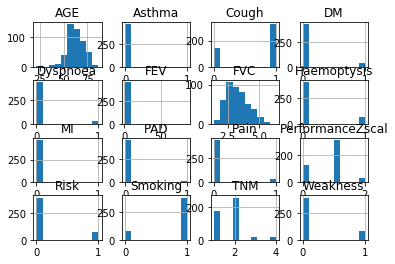

In [14]:
df.hist()
plt.show()

In [30]:
X = df1.values[:,1:16]

In [15]:
Y = df1['Risk']

### Deep Learning

In [31]:
# Create the model
model = Sequential()
model.add(Dense(12, input_dim=16, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

/home/rooot/Documents/JDeepLearning/tensorflow-dev/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=16, kernel_initializer="uniform", activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rooot/Documents/JDeepLearning/tensorflow-dev/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_initializer="uniform", activation="relu")`
  after removing the cwd from sys.path.
/home/rooot/Documents/JDeepLearning/tensorflow-dev/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="sigmoid")`
  """


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile Model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [34]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2)

Epoch 1/150
 - 2s - loss: 0.6517 - acc: 0.8064
Epoch 2/150
 - 1s - loss: 0.4667 - acc: 0.8511
Epoch 3/150
 - 1s - loss: 0.4262 - acc: 0.8511
Epoch 4/150
 - 1s - loss: 0.4237 - acc: 0.8511
Epoch 5/150
 - 1s - loss: 0.4214 - acc: 0.8511
Epoch 6/150
 - 1s - loss: 0.4207 - acc: 0.8511
Epoch 7/150
 - 1s - loss: 0.4175 - acc: 0.8511
Epoch 8/150
 - 1s - loss: 0.4184 - acc: 0.8511
Epoch 9/150
 - 1s - loss: 0.4146 - acc: 0.8511
Epoch 10/150
 - 0s - loss: 0.4129 - acc: 0.8511
Epoch 11/150
 - 0s - loss: 0.4139 - acc: 0.8511
Epoch 12/150
 - 0s - loss: 0.4100 - acc: 0.8511
Epoch 13/150
 - 1s - loss: 0.4087 - acc: 0.8511
Epoch 14/150
 - 1s - loss: 0.4063 - acc: 0.8511
Epoch 15/150
 - 0s - loss: 0.4032 - acc: 0.8511
Epoch 16/150
 - 0s - loss: 0.4006 - acc: 0.8511
Epoch 17/150
 - 1s - loss: 0.3966 - acc: 0.8511
Epoch 18/150
 - 1s - loss: 0.3929 - acc: 0.8511
Epoch 19/150
 - 0s - loss: 0.3912 - acc: 0.8511
Epoch 20/150
 - 0s - loss: 0.3849 - acc: 0.8511
Epoch 21/150
 - 1s - loss: 0.3769 - acc: 0.8511
E

In [27]:
# Evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step

acc: 85.11%


In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                192       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [28]:
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
# Jesus Saves @ JCharisTech